# World Data Visualization (2010)

In [13]:
# Data source - https://www.kaggle.com/fernandol/countries-of-the-world

# Import all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Library for plotting maps
import folium

In [14]:
# Read Countries of the World data, and dropping rows where fields are NaN
country_data = pd.read_csv("./csv-data/countries_of_the_world.csv")
# GeoJSON data to plot the map
country_geo = './geo-json-data/world-countries.json'
# Clean up Country field to strip it of spaces
country_data['Country'] = [x.strip() for x in country_data['Country']]
# Display data sample

In [15]:
# Create map to show literacy:
literacy_map = folium.Map()
# Clean up Literacy field to convert it from string with commas to int for folium
literacy_field = 'Literacy (%)'
literacy_data = (country_data[['Country', literacy_field]]).dropna(how='any')
literacy_data[literacy_field] = [int(float(x.replace(",", "."))) 
                                for x in literacy_data[literacy_field] if type(x)==type('')]
# Fill the cloropleth
literacy_map.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=literacy_data,
 columns=['Country', literacy_field],
 key_on='feature.properties.name',
# One of the following colors
# ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’,
# ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
 fill_color='PuBuGn',
 fill_opacity=0.8,
 line_opacity=0.5,
#  highlight=True,
 legend_name=literacy_field
)
# Display map
literacy_map

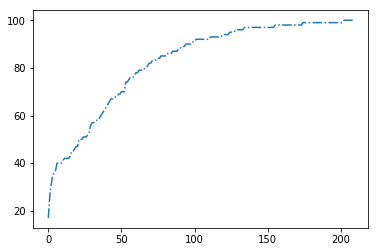

In [16]:
# Distribution of literacy rates, seems like high literacy rates are common
plt.plot([x for x in range(len(literacy_data))], sorted(literacy_data['Literacy (%)']), '-.')
plt.show()

In [17]:
# Create map to show phones (per 1000):
phones_map = folium.Map()
# Clean up Literacy field to convert it from string with commas to int for folium
phones_field = 'Phones (per 1000)'
phones_data = (country_data[['Country', phones_field]]).dropna(how='any')
phones_data
phones_data[phones_field] = [int(float(x.replace(",", "."))) 
                                for x in phones_data[phones_field] if type(x)==type('')]
# Fill the cloropleth
phones_map.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=phones_data,
 columns=['Country', phones_field],
 key_on='feature.properties.name',
# One of the following colors
# ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’,
# ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
 fill_color='YlOrRd',
 fill_opacity=0.8,
 line_opacity=0.5,
#  highlight=True,
 legend_name=phones_field
)
# Display map
phones_map